In [9]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import os
from os.path import expanduser
home_dir = expanduser("~")
module_path = home_dir + '/code/modules/'
fig_dir = 'figures/'
import sys
sys.path.append(module_path)
import time
import datetime
import importlib
import random
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

%load_ext autoreload
%autoreload 1
%aimport data_processing
%aimport plotting
# %aimport pso
%aimport pso_parallel_training_queue
from data_processing import *
from plotting import *
# from pso import *
from pso_parallel_training_queue import *

np.random.seed(999)
random.seed(999)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
### General parameters
total_set_size = 3e4 # how many examples will be used for training+validation+testing
train_size = 1e4
val_size = 1e4
test_size = 1e4
input_features = ['Halo_mass', 'Halo_mass_peak', 'Scale_peak_mass', 'Scale_half_mass']#, 'Redshift']
output_features = ['Stellar_mass', 'SFR']
redshifts = [0]#,.1,.2,.5,1,2,3,4,6,8]
same_n_points_per_redshift = True
outputs_to_weigh = ['Stellar_mass']
weigh_by_redshift = True

reinforcement_learning = True
real_observations = False

verbatim = True

### Network parameters
nr_hidden_layers = 6
activation_function = 'tanh'
output_activation = {'SFR': None, 'Stellar_mass': None}
nr_neurons_per_layer = 6
regularisation_strength = 1e-2
std_penalty = False
norm = {'input': 'zero_mean_unit_std',
        'output': 'zero_mean_unit_std'} # 'none',   'zero_mean_unit_std',   'zero_to_one'

### PSO parameters
nr_processes = 30
nr_iterations = 1000
x_min = -10
x_max = 10
alpha = 1
delta_t = 1
c1 = 2
c2 = 2
inertia_weight_start = 1.4
inertia_weight_min = 0.1
exploration_fraction = 0.8            # start making sure that the network did not converge to a local minimum
min_std_tol = 0.01                # minimum allowed std for any parameter
pso_param_dict = {
    'nr_particles': 3 * nr_processes,
    'patience': 1000,
    'patience_parameter': 'train',
    'restart_check_interval': 200
}

os.environ["CUDA_VISIBLE_DEVICES"] = ""

# Load and preprocess the data

In [3]:
# load the selected galaxyfile
galaxies, data_keys, unit_dict = load_galfiles(redshifts=redshifts, equal_numbers=same_n_points_per_redshift)
    
# prepare the training data
training_data_dict = divide_train_data(galaxies, data_keys, input_features, output_features, redshifts, weigh_by_redshift, outputs_to_weigh,
                                       int(total_set_size), train_size=int(train_size), val_size=int(val_size), test_size=int(test_size), pso=True)
training_data_dict = normalise_data(training_data_dict, norm, pso=True)

# Create a new network

In [4]:
network = Feed_Forward_Neural_Network(nr_hidden_layers, nr_neurons_per_layer, input_features, output_features, 
                                      activation_function, output_activation, regularisation_strength)
network.setup_pso(pso_param_dict, reinf_learning=reinforcement_learning, real_observations=real_observations, nr_processes=nr_processes)
start = time.time()
network.train_pso(nr_iterations, training_data_dict, std_penalty=std_penalty, verbatim=verbatim)
end = time.time()

Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.


18:30:16  Iteration    0, particle  0, new swarm best. Train: 4.092e+08, Val: 3.571e+08
18:30:17  Iteration    0, particle  1, new swarm best. Train: 3.310e+08, Val: 2.953e+08
18:30:17  Iteration    0, particle  2, new swarm best. Train: 3.082e+08, Val: 3.655e+08
18:30:18  Iteration    0, particle  4, new swarm best. Train: 1.339e+08, Val: 9.690e+07
18:30:18  Iteration    0, particle 13, new swarm best. Train: 8.106e+05, Val: 4.582e+05
18:30:20  Iteration    1, particle 83, new swarm best. Train: 2.640e+02, Val: 2.779e+02
18:30:22  Iteration    2, particle 28, new swarm best. Train: 6.785e+01, Val: 6.759e+01
18:30:24  Iteration    3, particle 89, new swarm best. Train: 6.488e+01, Val: 6.356e+05
18:30:26  Iteration    4, particle  8, new swarm best. Train: 3.934e+01, Val: 3.915e+01
18:30:26  Iteration    4, particle 11, new swarm best. Train: 3.739e+01, Val: 3.683e+01
18:30:27  Iteration    4, particle 77, new swarm best. Train: 2.865e+01, Val: 2.145e+01
18:30:29  Iteration    5, partic

Process Process-26:
Traceback (most recent call last):
Process Process-24:
Traceback (most recent call last):
Process Process-20:
Process Process-6:
Process Process-15:
Process Process-22:
Process Process-11:
Process Process-9:
Process Process-12:
Process Process-10:
  File "/opt/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process Process-30:
Process Process-17:
Process Process-28:
Traceback (most recent call last):
Process Process-7:
Process Process-23:
Process Process-21:
Process Process-4:
Process Process-18:
Process Process-8:
Process Process-13:
Process Process-16:
Process Process-25:
Process Process-3:
Process Process-2:
Process Process-19:
Process Process-5:
Process Process-14:
Process Process-1:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process Process-29:
Process Pr

  File "/opt/anaconda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/magnus/code/modules/pso_parallel_training_queue.py", line 493, in particle_evaluator
    position, particle_nr, mode = inp_queue.get()
  File "/opt/anaconda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/magnus/code/modules/pso_parallel_training_queue.py", line 493, in particle_evaluator
    position, particle_nr, mode = inp_queue.get()
  File "/opt/anaconda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/magnus/code/modules/pso_parallel_training_queue.py",

  File "/opt/anaconda/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/opt/anaconda/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/opt/anaconda/lib/python3.6/multiprocessing/queues.py", line 93, in get
    with self._rlock:
  File "/opt/anaconda/lib/python3.6/multiprocessing/queues.py", line 93, in get
    with self._rlock:
  File "/opt/anaconda/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/opt/anaconda/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/opt/anaconda/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/opt/anaconda/lib/python3.6/multiprocessing/queues.py", line 93, in get
    with self._rlock:
  File "/opt/anaconda/lib/python3.6/multiprocessing/synchronize.p

KeyboardInterrupt: 

In [ ]:
print('Time elapsed with CPUs (train size {:d}): {:.0f}s'.format(train_size, (end-start)))

In [ ]:
print('Time elapsed with GPUs (train size {:d}): {:.0f}s'.format(train_size, (end-start)))

#### Set plot variables

In [6]:
### Standard plots
from keras.models import load_model

model = load_model('trained_networks/best_model.h5')
training_data_dict = pickle.load( open( "trained_networks/best_model_training_data_dict.p", "rb" ) )

mode = 'train' # 'train', 'val, 'test'
best_weights = 'val' # 'train', 'val'

# network.pso_swarm.set_best_weights(best_weights)
# norm_score = network.pso_swarm.evaluate_model(mode)
# tot_score = norm_score
# test_score = network.pso_swarm.evaluate_model(mode)
# model = network.model
# output_dict = {
#     'Stellar_mass': training_data_dict['input_'+mode+'_dict']['main_input'][:, 0]#,
# #    'SFR': training_data_dict['input_'+mode+'_dict']['main_input'][:, 1]
# }
# weights_dict = {
#     'Stellar_mass': training_data_dict[mode+'_weights'][:, 0]#,
# #    'SFR': training_data_dict[mode+'_weights'][:, 1]
# }

# tot_score = norm_score
predicted_points = predict_points(model, training_data_dict, mode = mode, original_units=False)
title = 'Inputs: {}\n{:.1e} train points, {}'.format(', '.join(input_features), train_size, mode)

#### Get reinforcement learning plots

KeyError: 'SMF'

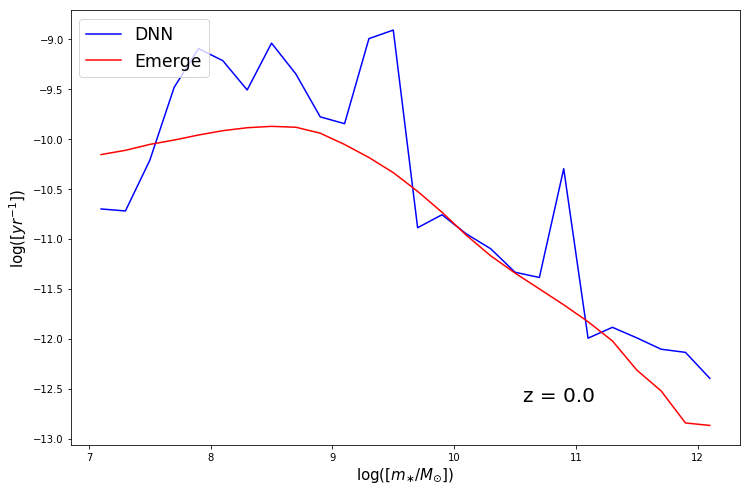

In [10]:
fig73 = get_ssfr_plot(model, training_data_dict, unit_dict, galaxies=None, title=None, data_type=mode)
fig55 = get_smf_plot(model, training_data_dict, unit_dict, galaxies=None, title=None, data_type=mode)

In [ ]:
fig73.savefig(fig_dir + 'ssfr_as_loss_func.png', bbox_inches = 'tight')

#### Get standard pictures

In [ ]:
fig1 = get_pred_vs_real_scatterplot(model, training_data_dict, unit_dict, data_keys, 'Stellar_mass', pso=True, title=title, data_type=mode,
                                   predicted_points = predicted_points, galaxies=galaxies)

fig2 = get_real_vs_pred_boxplot(model, training_data_dict, unit_dict, data_keys, pso=True, predicted_feat = 'Stellar_mass', 
                                binning_feat = 'Halo_mass', title=title, data_type=mode,
                                predicted_points = predicted_points)

fig3 = get_halo_stellar_mass_plots(model, training_data_dict, unit_dict, pso=True, title=title, y_max = None, y_min = None,
                                    x_min = None, x_max = None, data_type=mode, predicted_points = predicted_points)
fig4 = get_stellar_mass_sfr_plots(model, training_data_dict, unit_dict, pso=True, title=title, y_max = None, y_min = None,
                                    x_min = None, x_max = None, data_type=mode, predicted_points = predicted_points)
fig5 = get_real_vs_pred_boxplot(model, training_data_dict, unit_dict, data_keys, pso=True, predicted_feat = 'SFR', 
                                binning_feat = 'Stellar_mass', title=title, data_type=mode,
                                predicted_points = predicted_points)
plt.show

In [ ]:
fig6 = get_real_vs_pred_same_fig(model, training_data_dict, unit_dict, x_axis_feature='Halo_mass', 
                                 y_axis_feature = 'Stellar_mass', pso=True, title=title, data_type=mode, marker_size=20, predicted_points=predicted_points,
                                 y_min=None, y_max=None, x_min=None, x_max=None)
# fig7 = get_real_vs_pred_same_fig(model, training_data_dict, unit_dict, x_axis_feature='Stellar_mass', 
#                                  y_axis_feature = 'SFR', pso=True, title=title, data_type=mode, marker_size=20,
#                                  y_min=None, y_max=None, x_min=None, x_max=None)
plt.show

In [ ]:
fig6.savefig(fig_dir + 'proof_of_concept_3x3_net_one_output_no_weighing.png', bbox_inches = 'tight')

In [ ]:
mode = 'train'
network.pso_swarm.set_best_weights('train')
norm_score = network.pso_swarm.evaluate_model(mode)
tot_score = norm_score
model = network.model
title = 'Inputs: %s\ntest mse %.3e, %s data' % (', '.join(input_features), tot_score, mode)

fig1 = get_pred_vs_real_scatterplot(model, training_data_dict, unit_dict, data_keys, 'SFR', title=title, mode=mode)
fig2 = get_real_vs_pred_boxplot(model, training_data_dict, unit_dict, data_keys, predicted_feat = 'Stellar_mass', 
                                binning_feat = 'Halo_mass', title=title, mode=mode)
fig3 = get_scatter_comparison_plots(model, training_data_dict, unit_dict, x_axis_feature = 'Halo_mass', 
                                    y_axis_feature = 'Stellar_mass', title=title, y_max = None, y_min = None,
                                    x_min = None, x_max = None, mode=mode)
fig4 = get_real_vs_pred_boxplot(model, training_data_dict, unit_dict, data_keys, 'SFR', 
                                binning_feat = 'Stellar_mass', title=title, mode=mode)
fig5 = get_scatter_comparison_plots(model, training_data_dict, unit_dict, x_axis_feature = 'Halo_mass', 
                                    y_axis_feature = 'SFR', title=title, y_max = 10, y_min = None,
                                    x_min = None, x_max = None, mode=mode)

plt.show

In [ ]:
%matplotlib inline
nBins = 8
bin_edges = np.linspace(halo_min_mass, halo_max_mass, nBins+1)

predictedY = model.predict(x_test)

for i, feat in enumerate(output_features):
    
    
    ### Plot 1
    fig = plt.figure(figsize=(16,16))
    ax = plt.subplot(211)
    plt.plot(y_test[:,i], y_test[:,i], 'k.')
    plt.plot(predictedY[:,i], y_test[:,i], 'g.')
    plt.ylabel('True %s %s' % (feat, unit_dict[feat]), fontsize=15)
    plt.xlabel('Predicted %s %s' % (feat, unit_dict[feat]), fontsize=15)
    plt.legend(['Ideal result', 'predicted ' + feat], loc='upper center')
    plt.title('nIterations: %d, training set size: %d, test mse score: %.2e\n' % (nIterations, 
        train_size, testScore) + 
        '%d input feature(s): [%s]\n%d output feature(s): [%s]\n%d test data points (test) shown' % (
        len(input_features), ', '.join(input_features), len(output_features), ', '.join(output_features),
        test_size), y=1.03, fontsize=20)
    plt.show
        
    if save_figs:
        fig.savefig(fig_dir+'pso_output_scatter_%d_plot_from_' % (i+1)+'_and_'.join(input_features)+'_to_'+
            '_and_'.join(output_features)+'_with_'+param_string+'.png', bbox_inches = 'tight')
    
    ### Plot 2 - boxplot
    
    # bin_means contain (0: mean of the binned values, 1: bin edges, 2: numbers pointing each example to a bin)
    bin_means_true = stats.binned_statistic(x_test[:,i], y_test[:,i], bins=bin_edges)
    bin_means_pred = stats.binned_statistic(x_test[:,i], predictedY[:,i].flatten(), bins=bin_edges)
    bin_centers = []
    for iBin in range(nBins):
        bin_centers.append((bin_means_true[1][iBin] + bin_means_true[1][iBin+1]) / 2)
    sorted_true_y_data = []
    sorted_pred_y_data = []
    for iBin in range(1,nBins+1):
        sorted_true_y_data.append(y_test[bin_means_true[2] == iBin, i])
        sorted_pred_y_data.append(predictedY[bin_means_pred[2] == iBin,i])
    
    fig = plt.figure(figsize=(16,8))
    ax = plt.subplot(212)

    bin_pos = np.array([-2,-1]) # (because this makes it work)
    x_label_centers = []
    for iBin in range(nBins):
        # Every boxplot adds 2 boxes, one from the true data and one from the predicted data
        bin_pos += 3 
        plt.boxplot([sorted_true_y_data[iBin], sorted_pred_y_data[iBin]] , positions = bin_pos, widths = 0.9)
        x_label_centers.append(np.mean(bin_pos))
    
    plt.ylabel('%s %s' % (feat, unit_dict[feat]), fontsize=15)
    plt.xlabel('True Halo mass log($M_{G}/M_{S}$)', fontsize=15)
    ax.set_xlim(left=x_label_centers[0]-2, right=x_label_centers[-1]+2)
    #xlim(0,bin_pos[1] + 1)
    plt.xticks(x_label_centers, bin_centers) TODO fixa siffrorna
    plt.text(12,7,'Left: true data. Right: predicted data.', fontsize=20)
    
    if feat == 'SFR':
        ax.axhline(y=0, linestyle='--')
    
    #plt.title('nIterations: %d, training set size: %d, test mse score: %.2e\n' % (nIterations, 
    #    train_size, testScore) + 
    #    '%d input feature(s): [%s]\n%d output feature(s): [%s]\n%d test data points (test) shown' % (
    #    len(input_features), ', '.join(input_features), len(output_features), ', '.join(output_features),
    #    test_size), y=1.03, fontsize=20)
    
    plt.show()
    
    if save_figs:
        fig.savefig(fig_dir+'pso_output_boxplot_%d_from_' % (i+1)+'_and_'.join(input_features)+'_to_'+
            '_and_'.join(output_features)+'_with_'+param_string+'.png', bbox_inches = 'tight')

In [ ]:
# Summarize history for loss
%matplotlib inline
fig = plt.figure(5, figsize=(8,8))
plt.plot(trainingScoreHistory, 'b')
plt.plot(validationScoreHistory, 'r')
plt.yscale('log')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()